<a href="https://colab.research.google.com/github/AlyssaTang/FutureMakers/blob/main/Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

In [3]:
# load the dataset
df = pd.read_json("/content/gdrive/MyDrive/MIT SureStart/Dataset/Sarcasm_Headlines_Dataset.json.zip", lines=True)
#Lines = True reads the dataset  as individual lines

df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


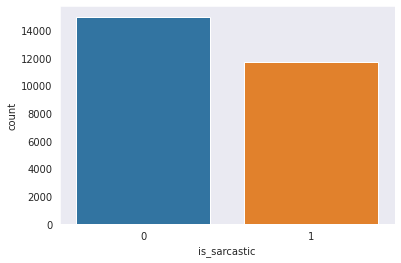

In [4]:
# plot the class distribution
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

#0 = not sarcastic
#1 = sarcastic

In [23]:
#print the number of data examples in each class
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [24]:
#print the number of data examples 
len(df.is_sarcastic)

26709

In [25]:
# define X & Y
X = df.iloc[:, 1] #can also use df['headline]
Y = df.iloc[:, 2]
print(X)

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object


In [26]:
# split the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
len(X_test)

5342

In [27]:
# data proprocessing
max_words = 1000
max_len = 150 #everything must be uniform; if shorter then padded, if longer, truncated 
tok = Tokenizer(num_words=max_words) #separating the indiviudals words into tokens & putting them into an array
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
sequences_matrix.shape

(21367, 150)

In [28]:
sequences_matrix

array([[  0,   0,   0, ..., 191,   6, 899],
       [  0,   0,   0, ...,   1, 318,   1],
       [  0,   0,   0, ..., 686,  18,  44],
       ...,
       [  0,   0,   0, ...,   4,   7,  17],
       [  0,   0,   0, ..., 186, 242, 516],
       [  0,   0,   0, ..., 605, 176,  45]], dtype=int32)

In [29]:
np.amax(sequences_matrix) #matrix varies from 0 to 999 since max_words = 1000

999

In [30]:
# define the RNN model
def RNN():
  inputs = Input(name='inputs', shape=[max_len]) #a mapping of a discrete — categorical — variable to a vector of continuous numbers
  layer = Embedding(max_words, 50, input_length=max_len)(inputs) #preprocessing
  layer = LSTM(64)(layer) #has memory, does the actual learning 
  layer = Dense(256, name='FC1')(layer) #fully connected layer
  layer = Activation('relu')(layer)
  layer = Dropout(0.2)(layer) #20% dropout
  layer = Dense(1, name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs, outputs=layer)
  return model

In [31]:
# compile the model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy']) #RMSprop is a version of adam w/ momentum

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [32]:
# fit the model
history = model.fit(sequences_matrix, Y_train, batch_size=100, epochs=5, validation_split=0.1)

Epoch 1/5
193/193 [==============================] - 5s 15ms/step - loss: 0.5648 - accuracy: 0.6806 - val_loss: 0.4043 - val_accuracy: 0.8128
Epoch 2/5
193/193 [==============================] - 2s 12ms/step - loss: 0.3753 - accuracy: 0.8318 - val_loss: 0.3908 - val_accuracy: 0.8255
Epoch 3/5
193/193 [==============================] - 2s 12ms/step - loss: 0.3589 - accuracy: 0.8377 - val_loss: 0.3909 - val_accuracy: 0.8264
Epoch 4/5
193/193 [==============================] - 2s 12ms/step - loss: 0.3512 - accuracy: 0.8427 - val_loss: 0.3939 - val_accuracy: 0.8278
Epoch 5/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3867 - accuracy: 0.8352 - val_loss: 0.6364 - val_accuracy: 0.7239


In [33]:
#evaluate the test set
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
test_sequences_matrix.shape

(5342, 150)

In [34]:
accr = model.evaluate(test_sequences_matrix, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

167/167 [==============================] - 1s 4ms/step - loss: 0.6585 - accuracy: 0.7158
Test set
  Loss: 0.659
  Accuracy: 0.716


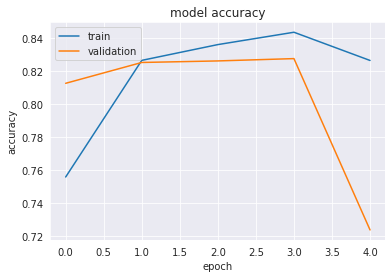

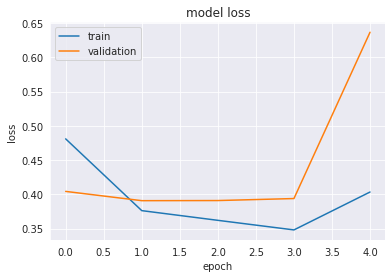

In [35]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()